In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os, os.path
from sklearn.model_selection import train_test_split
import skimage
from tensorflow.keras.models import Model
%matplotlib inline

In [11]:
img_list=[]
file_labels=[]
img_size=128 
path = r"C:\Users\Cristian\Desktop\Datasets\NEU-CLS" #path to dataset folder
valid_images =".bmp" #variable to select only files with extension .bmp

for f in os.listdir(path):
    #select only .bmp images files and append them to the empty img list as an array imgsize x imgsize
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    img= skimage.transform.resize(np.array((Image.open(os.path.join(path,f)))), (img_size,img_size)) 
    img_list.append(img)
    
for file in os.listdir(path):
    #Append the relevant part of the files name
    temp=file.lower()
    file_labels.append(temp.split('_')[0])
    
del file_labels[-1] #delete thumb.db file



In [12]:
#encoding of the labels
label_dic={'cr': np.array([1,0,0,0,0,0]),
           'in': np.array([0,1,0,0,0,0]),
           'pa':np.array([0,0,1,0,0,0] ),
           'ps':np.array([0,0,0,1,0,0] ),
           'rs':np.array([0,0,0,0,1,0] ),
           'sc':np.array([0,0,0,0,0,1] )}

label=np.asarray([label_dic[i] for i in file_labels])

train_labels = np.argmax(label, axis=1) #cross entropy doesn t work with one hot encoding so we'll use ordinal encoding

#dictionary to de-encode the prediction and to conver labels for a better plotting
de_encoder={ 0: 'crazing',
            1:'inclusion',
            2:'patches',
            3:'pitted surface' ,
            4:'rolled-in scale',
            5:'scratches'}



In [13]:
#Preparing dataset
data =np.asarray( np.expand_dims(img_list, axis=-1))
x_train, x_test, y_train, y_test = train_test_split(data, train_labels,
                                                    test_size=0.3, random_state=1 ,shuffle=True)

In [20]:
#Visualization of the dataset
dimension_img=(12,12)
fig=plt.figure(figsize=dimension_img)
rows=5
cols=5
for i in range(1,rows*cols+1):
    ax=plt.subplot(rows,cols,i)
    plt.imshow(np.squeeze(x_train[i]) , cmap='binary' )
    fig.subplots_adjust(wspace=0.2,hspace = 0.4)
    ax.set_title(de_encoder[y_train[i]])


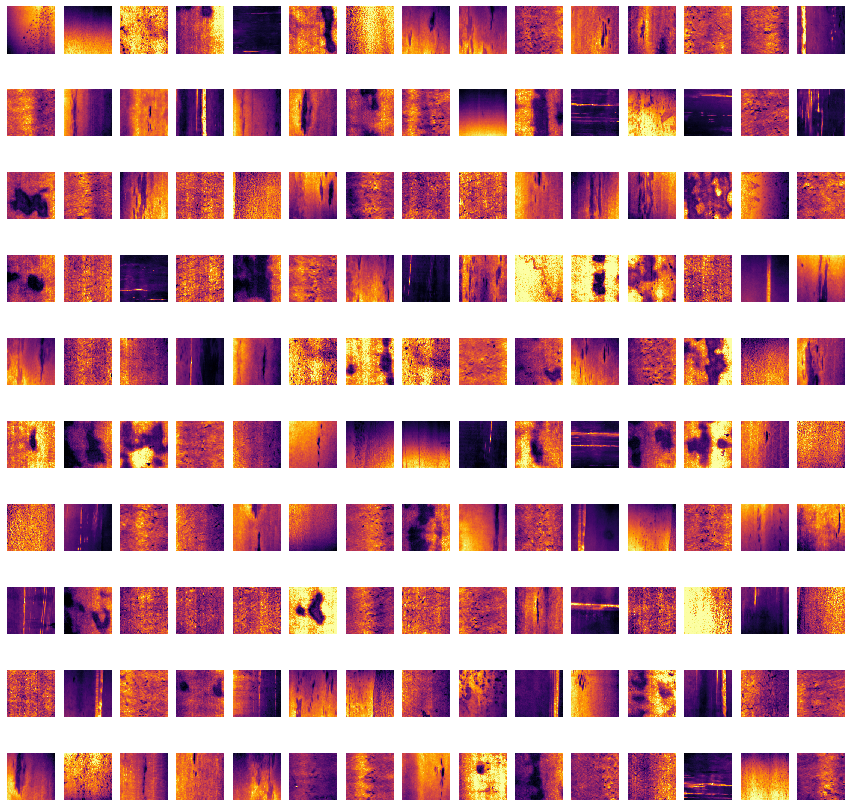

In [43]:
dimension_img=(15,15)
fig=plt.figure(figsize=dimension_img)
rows=10
cols=15
for i in range(1,rows*cols+1):
    ax=plt.subplot(rows,cols,i)
    plt.imshow(np.squeeze(x_train[i]) , cmap='inferno' )
    #fig.subplots_adjust(wspace=0.2,hspace = 0.2)
    ax.axis('off')
    

 -----------------------------------------------------------------------------------------------------------
 <span style="font-size:larger;">Standard CNN</span>
 ----------------------------------------------------------------------------------------------------------------

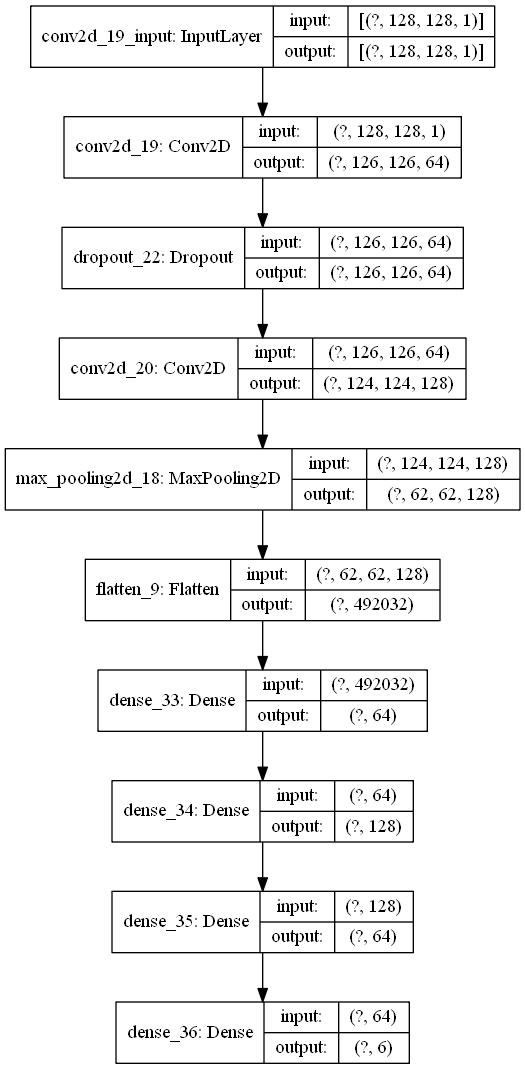

In [30]:
#Definition of the standard CNN model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=x_train[0].shape)) 
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))


tf.keras.utils.plot_model(
    model,
    to_file='standard_cnn.png',
    show_shapes=True)

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train,y_train, epochs=20, validation_data=(x_test,y_test))

Train on 1260 samples, validate on 540 samples
Epoch 1/20
1260/1260 [==============================] - 87s 69ms/sample - loss: 2.1080 - accuracy: 0.1619 - val_loss: 1.7711 - val_accuracy: 0.1815
Epoch 2/20
1260/1260 [==============================] - 86s 68ms/sample - loss: 1.6468 - accuracy: 0.2849 - val_loss: 1.6479 - val_accuracy: 0.2500
Epoch 3/20
1260/1260 [==============================] - 86s 69ms/sample - loss: 1.4708 - accuracy: 0.3754 - val_loss: 1.3481 - val_accuracy: 0.4759
Epoch 4/20
1260/1260 [==============================] - 86s 69ms/sample - loss: 1.2023 - accuracy: 0.5135 - val_loss: 1.1665 - val_accuracy: 0.5019
Epoch 5/20
1260/1260 [==============================] - 87s 69ms/sample - loss: 1.0670 - accuracy: 0.5857 - val_loss: 0.9585 - val_accuracy: 0.5852
Epoch 6/20
1260/1260 [==============================] - 86s 69ms/sample - loss: 0.9355 - accuracy: 0.6151 - val_loss: 0.9382 - val_accuracy: 0.5963
Epoch 7/20
1260/1260 [==============================] - 87s 69ms/

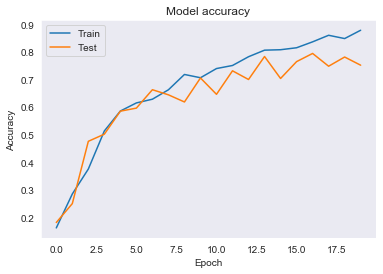

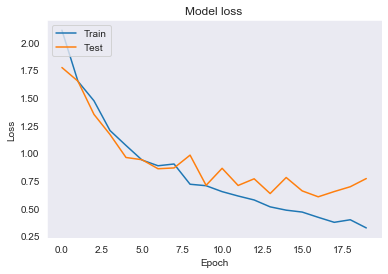

In [32]:
import seaborn as sns
sns.set_style("dark")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



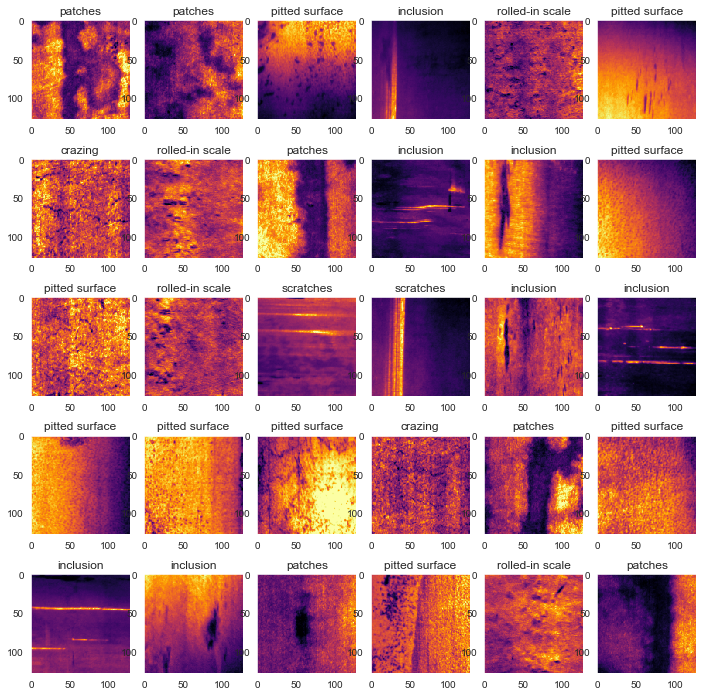

In [33]:
i=np.random.randint(0,300)
dimension_img=(12,12)
fig=plt.figure(figsize=dimension_img)
rows=5
cols=6
img_test=x_test[i:i+rows*cols]
predicted_label=model.predict(img_test)
for i in range(1,rows*cols+1):
    ax=plt.subplot(rows,cols,i)
    plt.imshow(np.squeeze(img_test[i-1]) , cmap='inferno' )
    fig.subplots_adjust(wspace=0.1,hspace = 0.4)
    ax.set_title(de_encoder[np.argmax(predicted_label[i-1])])


 -----------------------------------------------------------------------------------------------------------
 <span style="font-size:larger;">Custom 2 channel CNN</span>
 ----------------------------------------------------------------------------------------------------------------

In [34]:
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dropout, Dense, multiply, add
from tensorflow.keras.models import Model
input_dim=x_train.shape[1:]

input_layer_1=Input(shape=input_dim)

conv1=Conv2D(64, (3,3), activation='relu',padding='same')(input_layer_1)
conv1=Dropout(0.2)(conv1)
pool1=MaxPooling2D(pool_size=(2, 2))(conv1)

conv1=Conv2D(64, (3,3), activation='relu',padding='same')(pool1)
conv1=Dropout(0.2)(conv1)
pool1=MaxPooling2D(pool_size=(2, 2))(conv1)

flat=Flatten()(pool1)
fnn1=Dense(64, activation='relu')(flat)
fnn2=Dense(128, activation='relu')(flat)

fnn1=concatenate([fnn1,fnn2])
fnn1=Dense(64,activation='relu')(fnn1)
fnn1=Dense(32,activation='relu')(fnn1)
fnn2=Dense(128,activation='relu')(fnn2)

merge=concatenate([fnn1,fnn2])
merge=Dense(128,activation='relu')(merge)
merge=Dropout(0.2)(merge)
merge=Dense(64,activation='relu')(merge)
fnn_out=Dense(6, activation = 'softmax')(merge)

In [35]:
model=Model(input_layer_1, fnn_out)
tf.keras.utils.plot_model(
    model,
    to_file='parallel_cnn.png',
    show_shapes=True)

Train on 1260 samples, validate on 540 samples
Epoch 1/20
1260/1260 [==============================] - 37s 29ms/sample - loss: 1.7729 - accuracy: 0.1952 - val_loss: 1.7595 - val_accuracy: 0.2444
Epoch 2/20
1260/1260 [==============================] - 36s 28ms/sample - loss: 1.4826 - accuracy: 0.3968 - val_loss: 1.1766 - val_accuracy: 0.6241
Epoch 3/20
1260/1260 [==============================] - 35s 28ms/sample - loss: 1.0786 - accuracy: 0.5810 - val_loss: 0.9250 - val_accuracy: 0.6333
Epoch 4/20
1260/1260 [==============================] - 35s 28ms/sample - loss: 0.8304 - accuracy: 0.6690 - val_loss: 0.5960 - val_accuracy: 0.8000
Epoch 5/20
1260/1260 [==============================] - 35s 28ms/sample - loss: 0.6318 - accuracy: 0.7460 - val_loss: 0.5243 - val_accuracy: 0.8130
Epoch 6/20
1260/1260 [==============================] - 35s 28ms/sample - loss: 0.6194 - accuracy: 0.7611 - val_loss: 0.6052 - val_accuracy: 0.8222
Epoch 7/20
1260/1260 [==============================] - 35s 28ms/

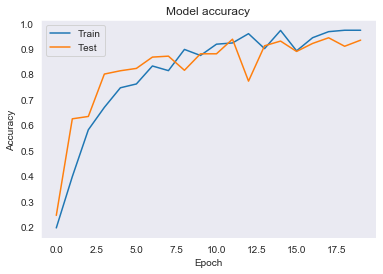

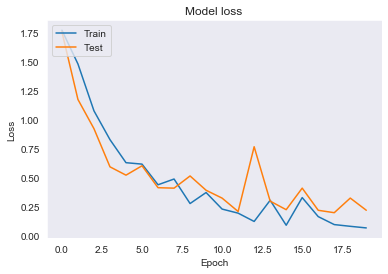

In [36]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=20, validation_data=(x_test,y_test))
import seaborn as sns
sns.set_style("dark")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [37]:
i=np.random.randint(0,300)
dimension_img=(12,12)
fig=plt.figure(figsize=dimension_img)
rows=5
cols=6
img_test=x_test[i:i+rows*cols]
predicted_label=model.predict(img_test)
for i in range(1,rows*cols+1):
    ax=plt.subplot(rows,cols,i)
    plt.imshow(np.squeeze(img_test[i-1]) , cmap='inferno' )
    fig.subplots_adjust(wspace=0.1,hspace = 0.4)
    ax.set_title(de_encoder[np.argmax(predicted_label[i-1])])


-----------------------------------------------------------------------------------------------------------
 <span style="font-size:larger;">Deeper CNN</span>
 ----------------------------------------------------------------------------------------------------------------

In [38]:
# from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dropout, Dense,concatenate

input_dim=x_train.shape[1:]

input_layer_1=Input(shape=input_dim)

conv1=Conv2D(64, (3,3), activation='relu',padding='same')(input_layer_1)
conv1=Dropout(0.2)(conv1)
pool1=MaxPooling2D(pool_size=(2, 2))(conv1)

conv1=Conv2D(128, (3,3), activation='relu',padding='same')(pool1)
conv1=Dropout(0.2)(conv1)
pool1=MaxPooling2D(pool_size=(2, 2))(conv1)

conv1=Conv2D(256, (3,3), activation='relu',padding='same')(pool1)
conv1=Dropout(0.2)(conv1)
pool1=MaxPooling2D(pool_size=(2, 2))(conv1)

flat=Flatten()(pool1)
h1=Dense(64, activation='relu')(flat)
h2=Dense(128,activation='relu')(h1)
h3=Dense(256,activation='relu')(h2)
h3=Dropout(0.2)(h3)
h3=Dense(256,activation='relu')(h2)
h3=Dropout(0.2)(h3)
h3=Dense(256,activation='relu')(h2)
h2=Dense(128,activation='relu')(h3)
merge=Dense(64, activation='relu')(h2)
fnn_out=Dense(6, activation = 'softmax')(merge)


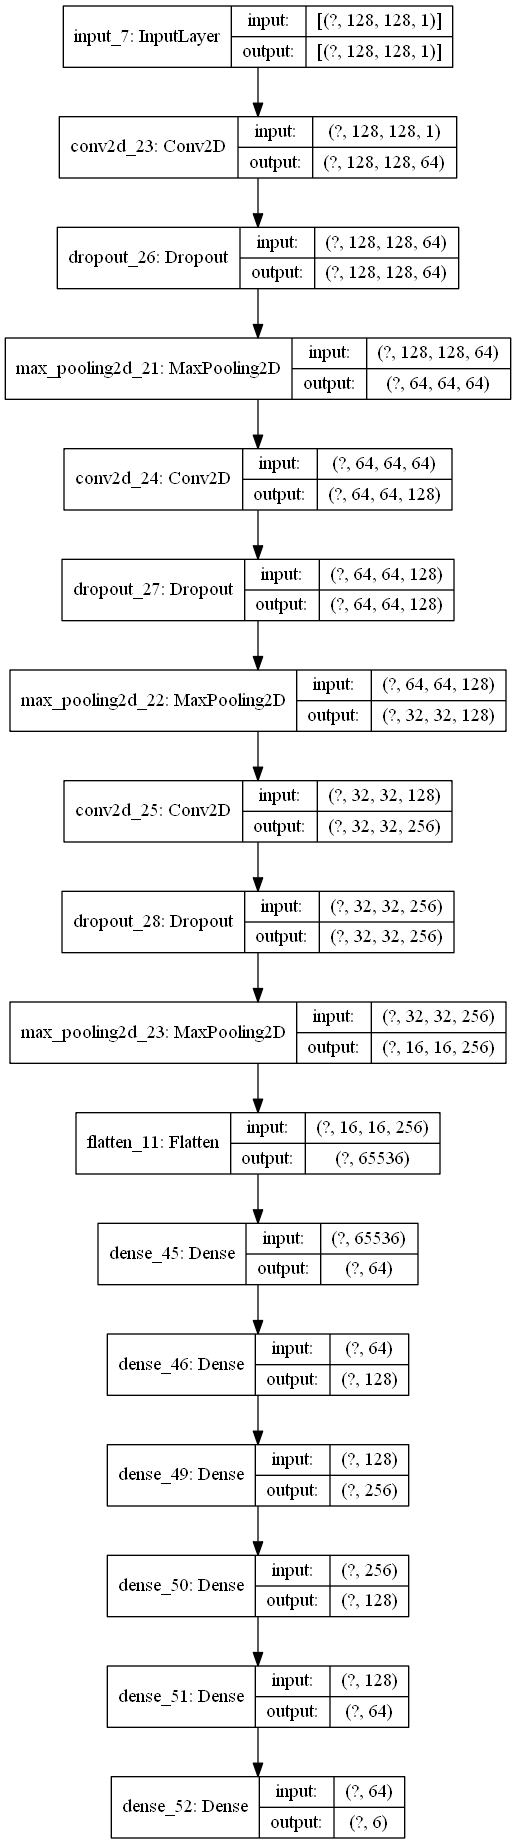

In [39]:
model=Model(input_layer_1, fnn_out)
tf.keras.utils.plot_model(
    model,
    to_file='deep_cnn.png',
    show_shapes=True)

In [40]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=20, validation_data=(x_test,y_test))

Train on 1260 samples, validate on 540 samples
Epoch 1/20
1260/1260 [==============================] - 70s 55ms/sample - loss: 1.7406 - accuracy: 0.2143 - val_loss: 1.6740 - val_accuracy: 0.4778
Epoch 2/20
1260/1260 [==============================] - 69s 55ms/sample - loss: 1.3261 - accuracy: 0.5071 - val_loss: 1.2358 - val_accuracy: 0.5352
Epoch 3/20
1260/1260 [==============================] - 75s 59ms/sample - loss: 0.8515 - accuracy: 0.7056 - val_loss: 0.9276 - val_accuracy: 0.6574
Epoch 4/20
1260/1260 [==============================] - 73s 58ms/sample - loss: 0.7207 - accuracy: 0.7683 - val_loss: 0.7188 - val_accuracy: 0.7815
Epoch 5/20
1260/1260 [==============================] - 68s 54ms/sample - loss: 0.3940 - accuracy: 0.8635 - val_loss: 1.0312 - val_accuracy: 0.6611
Epoch 6/20
1260/1260 [==============================] - 69s 54ms/sample - loss: 0.2980 - accuracy: 0.8992 - val_loss: 0.3932 - val_accuracy: 0.8593
Epoch 7/20
1260/1260 [==============================] - 67s 53ms/

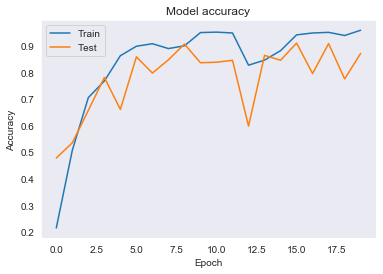

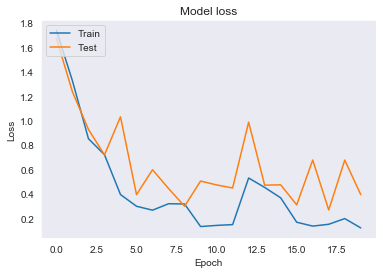

In [41]:
import seaborn as sns
sns.set_style("dark")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [42]:
i=np.random.randint(0,300)
dimension_img=(12,12)
fig=plt.figure(figsize=dimension_img)
rows=5
cols=6
img_test=x_test[i:i+rows*cols]
predicted_label=model.predict(img_test)
for i in range(1,rows*cols+1):
    ax=plt.subplot(rows,cols,i)
    plt.imshow(np.squeeze(img_test[i-1]) , cmap='inferno' )
    fig.subplots_adjust(wspace=0.1,hspace = 0.4)
    ax.set_title(de_encoder[np.argmax(predicted_label[i-1])])


-----------------------------------------------------------------------------------------------------------
# Other types of NN

In [118]:
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D, concatenate, UpSampling2D
y_train=np.array([1 if i>0 else 0 for i in y_train])
y_test=np.array([1 if i>0 else 0 for i in y_test ])


In [127]:
# encoder 

dimension=x_train.shape[1:]
n_classes=1
input_layer=Input(shape=dimension)
conv1=Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
conv1=Dropout(0.2)(conv1)
conv1=Conv2D(32, (3,3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2=Conv2D(64, (3,3), activation='relu', padding='same')(pool1)
conv2=Dropout(0.2)(conv2)
conv2=Conv2D(64, (3,3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

#decoder
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Dropout(0.2)(conv3)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

up1 = concatenate([UpSampling2D((2, 2))(conv3), conv2], axis=-1)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
conv4 = Dropout(0.2)(conv4)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

up2 = concatenate([UpSampling2D((2, 2))(conv4), conv1], axis=-1)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
conv5 = Dropout(0.2)(conv5)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

output_layer = Conv2D( n_classes , (1, 1) , activation='sigmoid')(conv5)


In [128]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

model = Model(inputs=input_layer ,  outputs=output_layer )
tf.keras.utils.plot_model(
    model,
    show_shapes=True)



In [65]:
model.summary()

3
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 128, 128, 32) 320         input_4[0][0]                    
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 128, 128, 32) 0           conv2d_33[0][0]                  
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 128, 128, 32) 9248        dropout_15[0][0]                 
__________________________________________________________________________________________

In [129]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(x=x_train,y=x_train ,epochs=20, validation_data=(x_test, x_test))

Train on 1260 samples, validate on 540 samples
Epoch 1/20
1260/1260 [==============================] - 195s 155ms/sample - loss: 0.0195 - accuracy: 0.0056 - val_loss: 0.0139 - val_accuracy: 0.0049
Epoch 2/20
1260/1260 [==============================] - 195s 154ms/sample - loss: 0.0024 - accuracy: 0.0058 - val_loss: 0.0071 - val_accuracy: 0.0049
Epoch 3/20
1260/1260 [==============================] - 192s 153ms/sample - loss: 0.0015 - accuracy: 0.0058 - val_loss: 0.0038 - val_accuracy: 0.0049
Epoch 4/20
1260/1260 [==============================] - 193s 153ms/sample - loss: 0.0011 - accuracy: 0.0058 - val_loss: 0.0044 - val_accuracy: 0.0049
Epoch 5/20
1260/1260 [==============================] - 192s 152ms/sample - loss: 8.3764e-04 - accuracy: 0.0058 - val_loss: 0.0044 - val_accuracy: 0.0049
Epoch 6/20
1260/1260 [==============================] - 192s 152ms/sample - loss: 7.1251e-04 - accuracy: 0.0058 - val_loss: 0.0041 - val_accuracy: 0.0049
Epoch 7/20
1260/1260 [=======================

KeyboardInterrupt: 